# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataframe = pd.read_csv('SINASC_RO_2019.csv')


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [51]:
import pandas as pd

df = pd.read_csv('SINASC_RO_2019.csv')

# Definindo os limites 
limites = [0,3,5,7,10]

categorias = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

df['APGAR5_Categoria'] = pd.cut(df['APGAR5'], bins=limites, labels=categorias)

print(df[['APGAR5', 'APGAR5_Categoria']].head())


   APGAR5 APGAR5_Categoria
0    10.0           normal
1     9.0           normal
2    10.0           normal
3    10.0           normal
4    10.0           normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

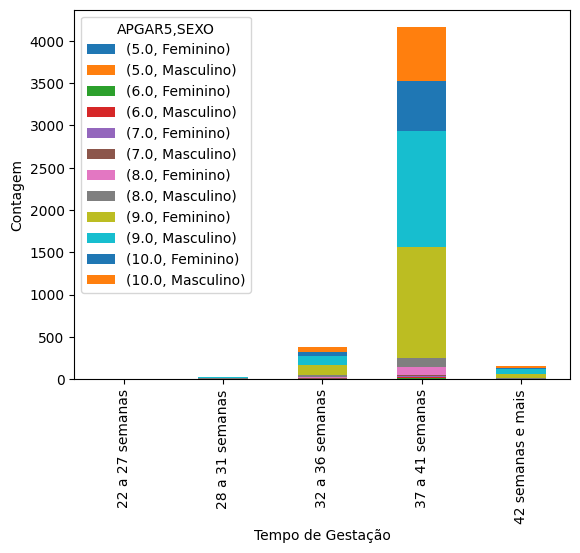

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

colunas = ['GESTACAO','APGAR5','SEXO']
dados = pd.read_csv('SINASC_RO_2019.csv', nrows=5000, usecols=colunas)

cruzando_dados = pd.crosstab(index=dados['GESTACAO'], columns=[dados['SEXO'], dados['APGAR5']])

#Filtrando as colunas da tabela, pegando o APGAR de 0 a 10
dados_filtrados = cruzando_dados.loc[:, (slice(None), [5,6,7, 8, 9, 10])]

#Organizando as colunas para agrupar sexo
dados_filtrados = dados_filtrados.swaplevel(axis=1).sort_index(axis=1)

#Fazendo o gráfico
dados_filtrados.plot(kind='bar', stacked=True)

#Criando rótulos dos eixos X e Y
plt.xlabel('Tempo de Gestação')
plt.ylabel('Contagem')

plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

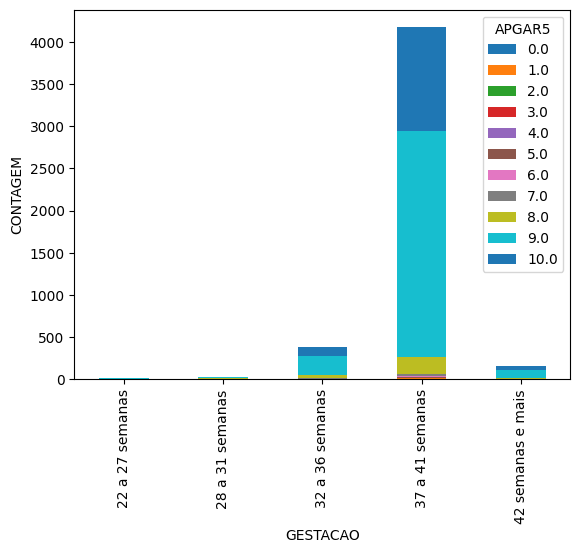

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

colunas = ['GESTACAO','APGAR5']
dados = pd.read_csv('SINASC_RO_2019.csv', nrows=5000, usecols=colunas)

cruzando_dados = pd.crosstab(index=dados['GESTACAO'], columns=[dados['APGAR5']])


#Fazendo o gráfico
cruzando_dados.plot(kind='bar', stacked=True)

#Criando rótulos dos eixos X e Y
plt.xlabel('GESTACAO')
plt.ylabel('CONTAGEM')

plt.show()

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [42]:
import pandas as pd
df_ = pd.read_csv('SINASC_RO_2019.csv')

df_2= df_[['GESTACAO', 'APGAR5']]

# Calcular as linha
df_calculo = df_2.groupby('GESTACAO')['APGAR5'].apply(lambda x: x.value_counts(normalize=True)).unstack()


print(df_calculo)


                         0.0       1.0       2.0       3.0       4.0    
GESTACAO                                                                
22 a 27 semanas      0.082353       NaN  0.094118  0.070588  0.011765  \
28 a 31 semanas           NaN       NaN  0.012346  0.006173  0.030864   
32 a 36 semanas      0.000895  0.000895  0.000895  0.000895  0.003581   
37 a 41 semanas      0.000222  0.000888  0.000133  0.000222  0.000311   
42 semanas e mais    0.001433       NaN       NaN       NaN       NaN   
Menos de 22 semanas  0.142857       NaN  0.142857       NaN       NaN   

                         5.0       6.0       7.0       8.0       9.0    
GESTACAO                                                                
22 a 27 semanas           NaN  0.023529  0.117647  0.282353  0.223529  \
28 a 31 semanas      0.043210  0.043210  0.067901  0.376543  0.339506   
32 a 36 semanas      0.004924  0.007610  0.025067  0.162041  0.585049   
37 a 41 semanas      0.000932  0.001998  0.006704 

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

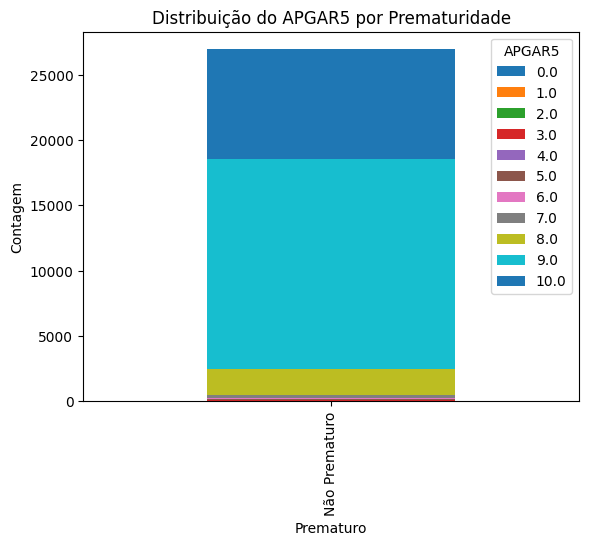

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar a base de dados SINASC do DataSUS
df_sinasc = pd.read_csv('SINASC_RO_2019.csv')

# Converter a coluna 'GESTACAO' para o tipo numérico
df_sinasc['GESTACAO'] = pd.to_numeric(df_sinasc['GESTACAO'], errors='coerce')

# Criar uma nova coluna indicando se a gestação é prematura
df_sinasc['Prematuro'] = df_sinasc['GESTACAO'].apply(lambda x: 'Prematuro' if x < 37 else 'Não Prematuro')

# Criar a tabela cruzada
cross_table = pd.crosstab(df_sinasc['Prematuro'], df_sinasc['APGAR5'])

# Criar o gráfico de barras
cross_table.plot(kind='bar', stacked=True)

# Personalizar o gráfico
plt.xlabel('Prematuro')
plt.ylabel('Contagem')
plt.title('Distribuição do APGAR5 por Prematuridade')
plt.legend(title='APGAR5')

# Exibir o gráfico
plt.show()


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

Text(0, 0.5, 'APGAR5')

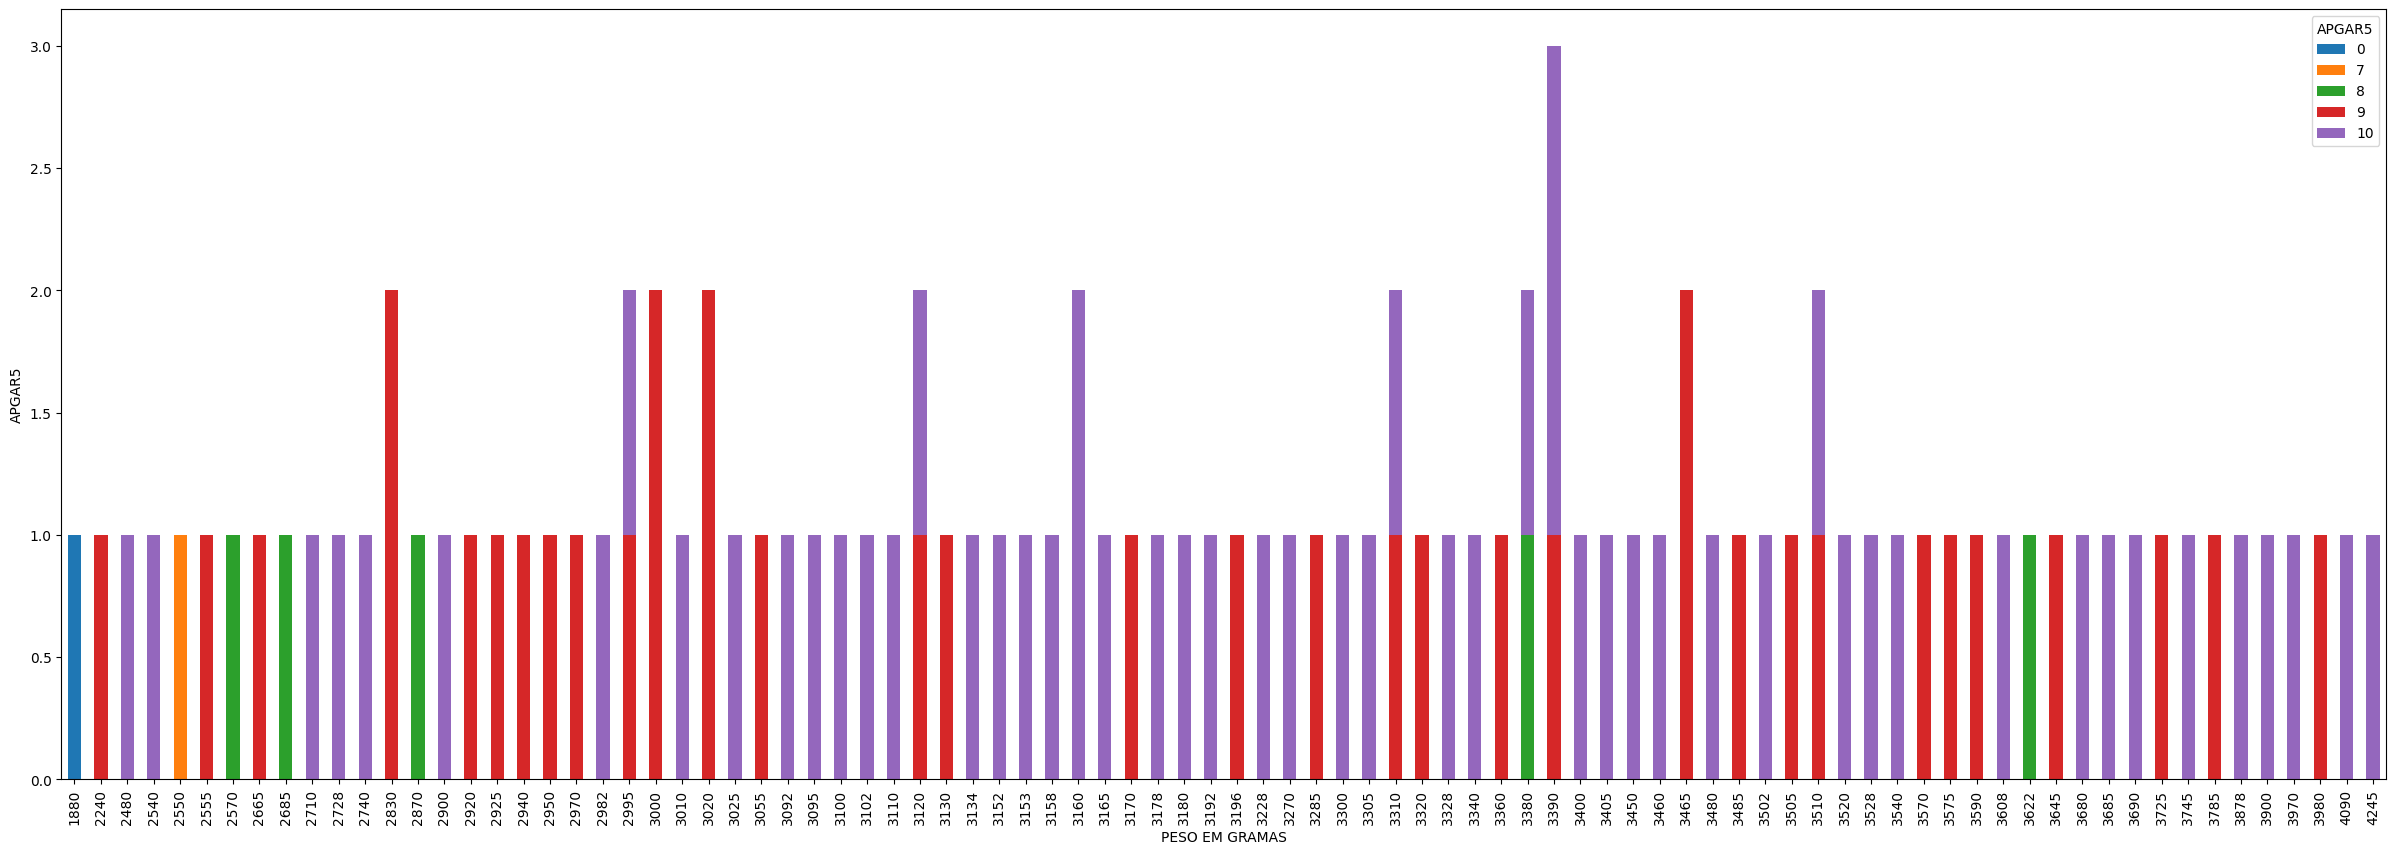

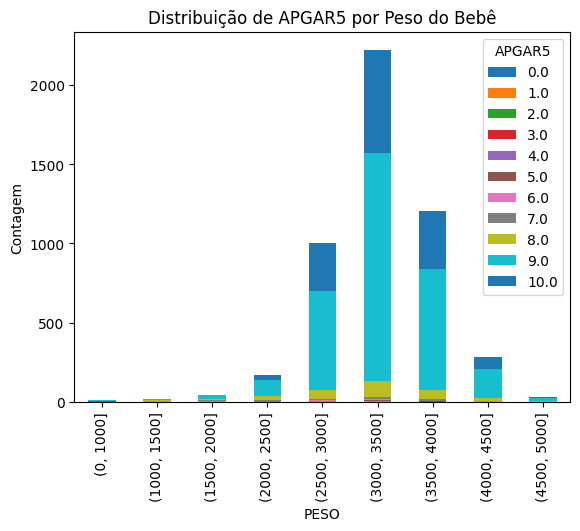

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

colunas = ['PESO', 'APGAR5']
dados = pd.read_csv('SINASC_RO_2019.csv', nrows=5000, usecols=colunas)

# Agrupar os valores da variável PESO em intervalos
dados['PESO_GROUP'] = pd.cut(dados['PESO'], bins=[0, 1000, 1500, 2000, 2500, 3000,3500,4000,4500, 5000])

# Criar a tabela cruzada entre PESO_GROUP e APGAR5
cruzando_dados = pd.crosstab(index=dados['PESO_GROUP'], columns=[dados['APGAR5']])

# Fazer o gráfico de barras empilhadas
cruzando_dados.plot(kind='bar', stacked=True)

# Criar rótulos dos eixos x e y
plt.xlabel('PESO')
plt.ylabel('Contagem')
plt.title('Distribuição de APGAR5 por Peso do Bebê')

plt.show()
